In [1]:
import pandas as pd
import numpy as np
import helper
import missingno as msno



## load all variables

In [2]:
## load target
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])

In [3]:
## weather
weather = pd.read_csv('cleaned_data/weather.csv', index_col=0, parse_dates=['Time'])

## Environmental Violations
env_viol = pd.read_csv('cleaned_data/env_violation.csv', index_col=0, parse_dates=['Time'])
# env_viol.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)

## Daycare
daycare = pd.read_csv('cleaned_data/daycare.csv', index_col=0, parse_dates=['Time'])
# daycare.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)

## key_econ
econ = pd.read_csv('cleaned_data/key_econ.csv', index_col=0, parse_dates= ['Time'])

## City unemployment
city_unemp = pd.read_csv('cleaned_data/city_unemployment_rates.csv', index_col=0, parse_dates= ['Time'])

## Monthly gas prices
gas_prices = pd.read_csv('cleaned_data/monthly_avg_gas_prices.csv', index_col=0, parse_dates= ['Time'])

## Monthly TNX
monthly_tnx = pd.read_csv('cleaned_data/monthly_tnx.csv', index_col=0, parse_dates= ['Time'])

## polling
polling = pd.read_csv('cleaned_data/poll_clean.csv', index_col=0, parse_dates=['Time'])

## Covid
covid = pd.read_csv('cleaned_data/covid_clean.csv', index_col=0, parse_dates=['Time'])

## new_biz_frames
# new_biz_ins = pd.read_csv('cleaned_data/new_biz_outlet_inside.csv', index_col=0, parse_dates= ['Time'])
new_biz_out = pd.read_csv('cleaned_data/new_biz_outlet.csv', index_col=0, parse_dates= ['Time'])
new_biz_tax = pd.read_csv('cleaned_data/new_biz_taxpayer.csv', index_col=0, parse_dates= ['Time'])

# ## liquor permit
# liquor = pd.read_csv('cleaned_data/liquor_permit.csv', index_col=0, parse_dates= ['date'])
# liquor.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)


## Sales tax allocation
sales_tax = pd.read_csv('cleaned_data/sales_tax_allocation.csv', index_col=0, parse_dates= ['Time'])

## sap_case_shiller
sap = pd.read_csv('cleaned_data/sap_case_shiller.csv', index_col=0, parse_dates= ['Time'])

## ACS
acs = pd.read_csv('cleaned_data/acs_clean.csv', index_col=0, parse_dates=['Time'])
acs2 = pd.read_csv('cleaned_data/acs2_clean.csv', index_col=0, parse_dates=['Time'])

<AxesSubplot:>

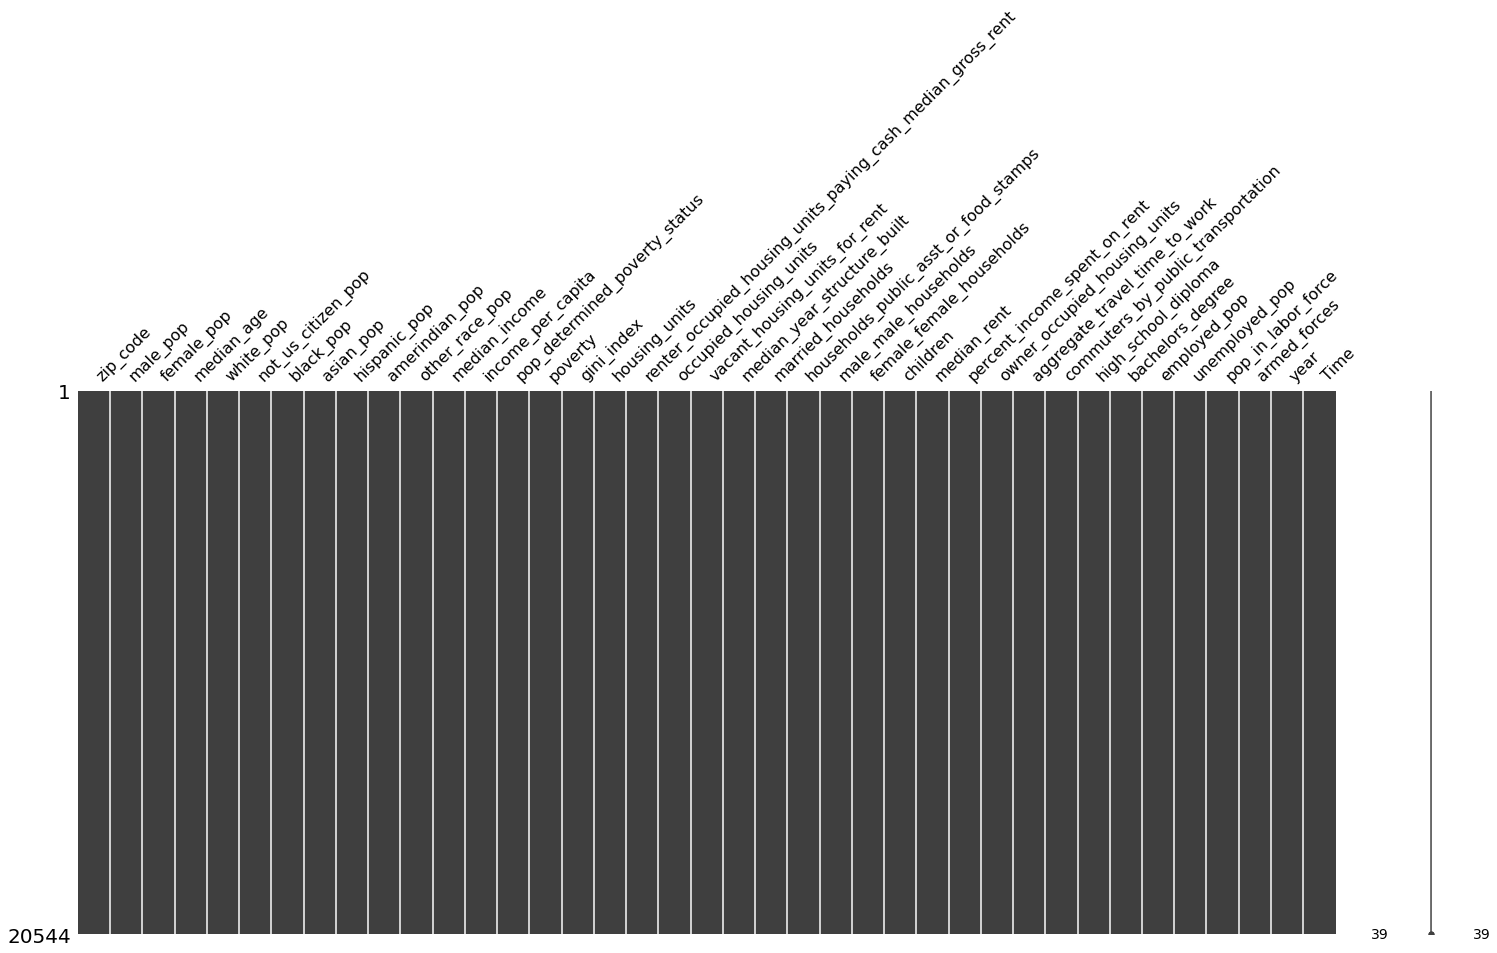

In [4]:
## Temporary merged to look at acs2
msno.matrix(acs)

In [5]:
## Get list of feature files
feature_frames = [weather, 
                   env_viol, 
                   daycare, 
                   econ, 
                   city_unemp, 
                   gas_prices, 
                   monthly_tnx, 
                   polling, 
                   covid, 
                   new_biz_out, 
                   new_biz_tax, 
                   sales_tax, 
                   sap,
                   acs,
                   acs2]
feature_frames_name = ['weather', 
                   'env_viol', 
                   'daycare', 
                   'econ', 
                   'city_unemp', 
                   'gas_prices', 
                   'monthly_tnx', 
                   'polling', 
                   'covid', 
                   'new_biz_out', 
                   'new_biz_tax', 
                   'sales_tax', 
                   'sap',
                   'acs',
                   'acs2']

## look at time ranges

In [6]:
for idx, frame in enumerate(feature_frames):
    date_range = str(frame['Time'].dt.date.min()) + ' to ' +str(frame['Time'].dt.date.max())
    print(f'{feature_frames_name[idx]}: {date_range}')

weather: 2012-01-01 to 2021-08-01
env_viol: 2012-01-01 to 2021-08-01
daycare: 2012-01-01 to 2021-09-01
econ: 2012-01-01 to 2021-08-01
city_unemp: 2011-07-01 to 2021-07-01
gas_prices: 2000-06-01 to 2021-08-01
monthly_tnx: 2010-01-01 to 2021-08-01
polling: 2011-02-01 to 2021-07-01
covid: 2012-01-01 to 2021-08-01
new_biz_out: 2012-01-01 to 2021-08-01
new_biz_tax: 2012-01-01 to 2021-08-01
sales_tax: 2013-01-01 to 2021-08-01
sap: 2011-06-01 to 2021-06-01
acs: 2011-01-01 to 2018-12-01
acs2: 2011-01-01 to 2019-12-01


## look at missing values in each

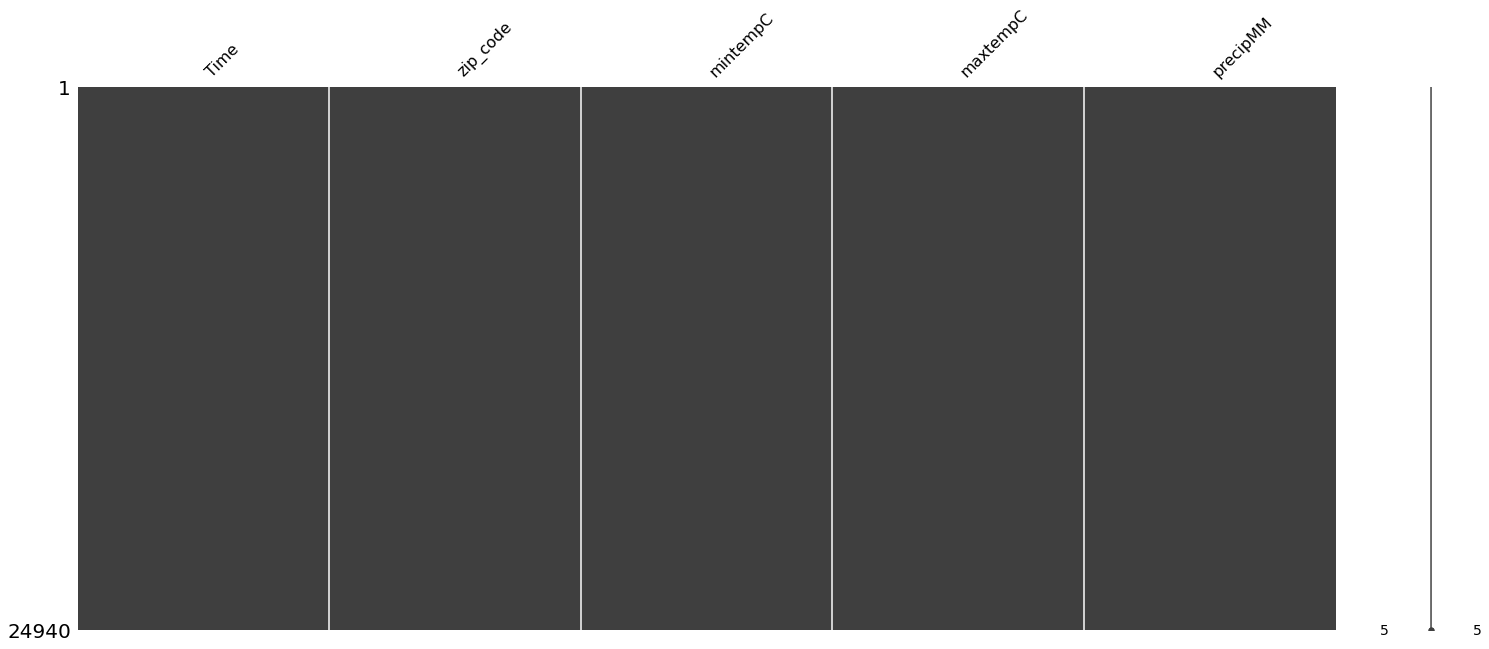

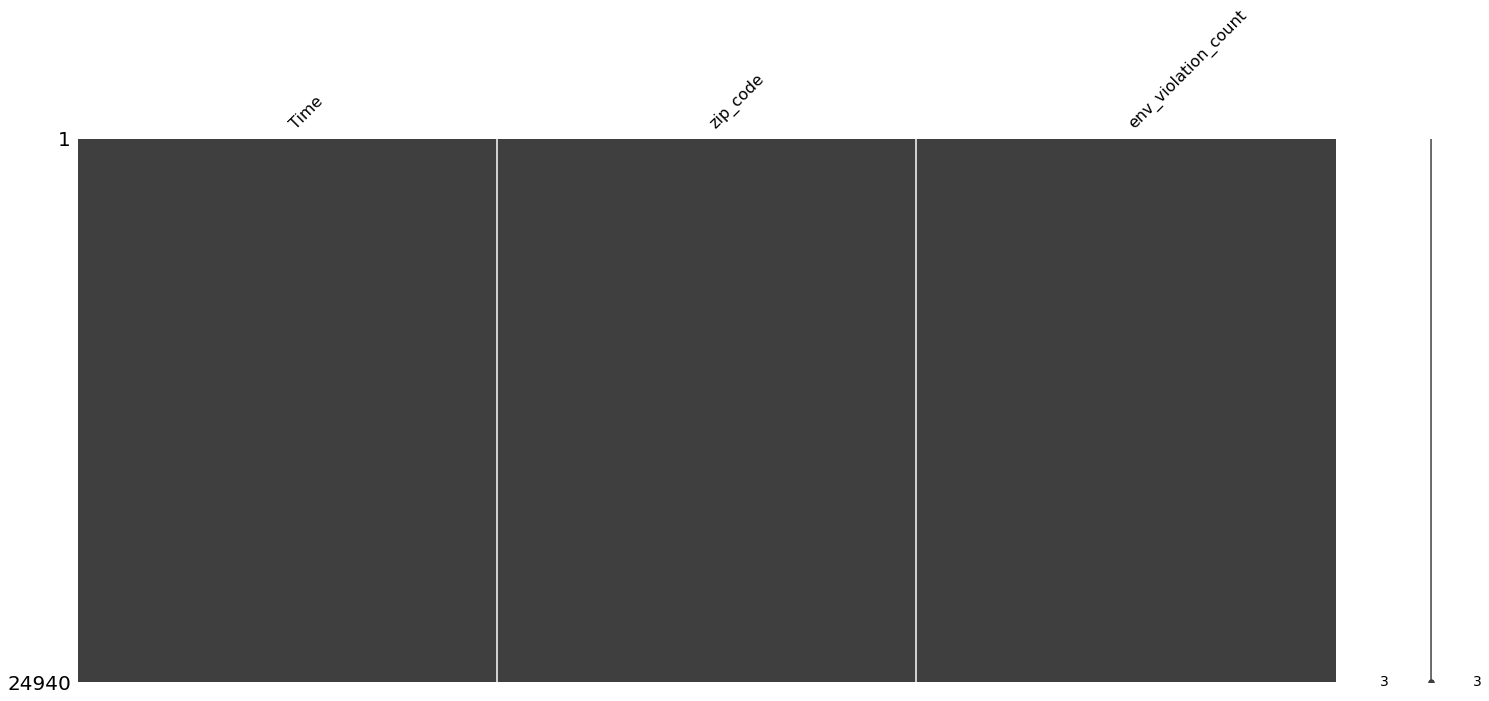

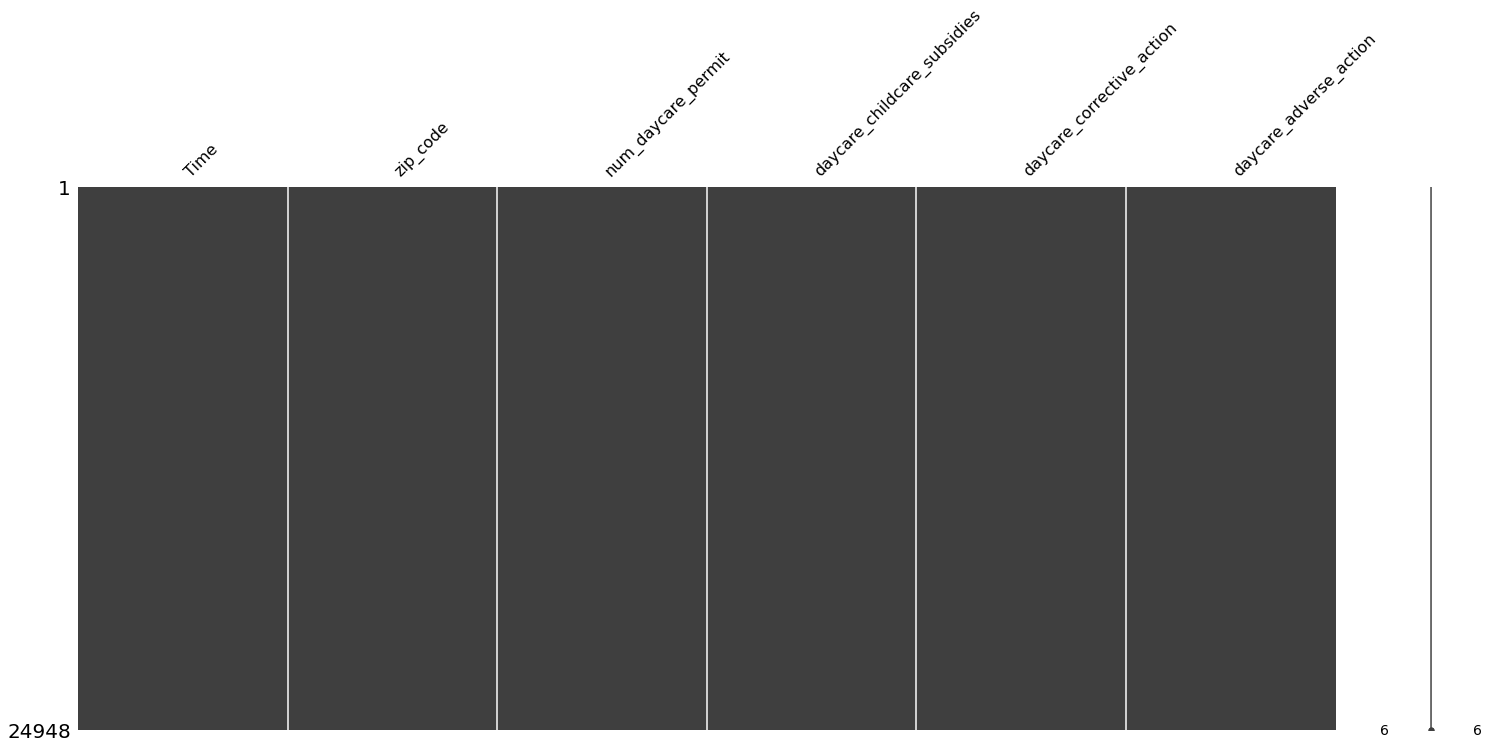

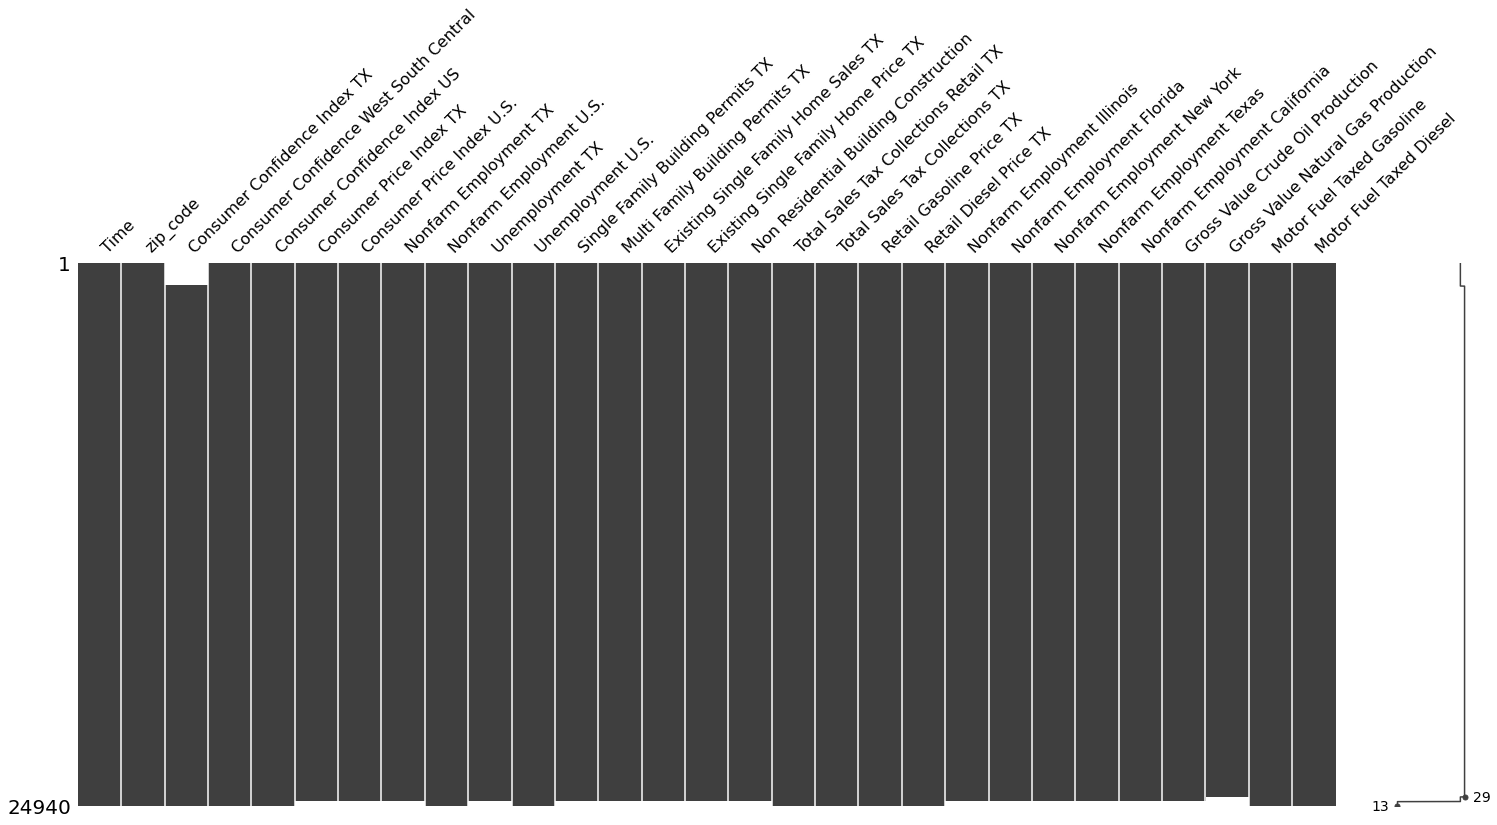

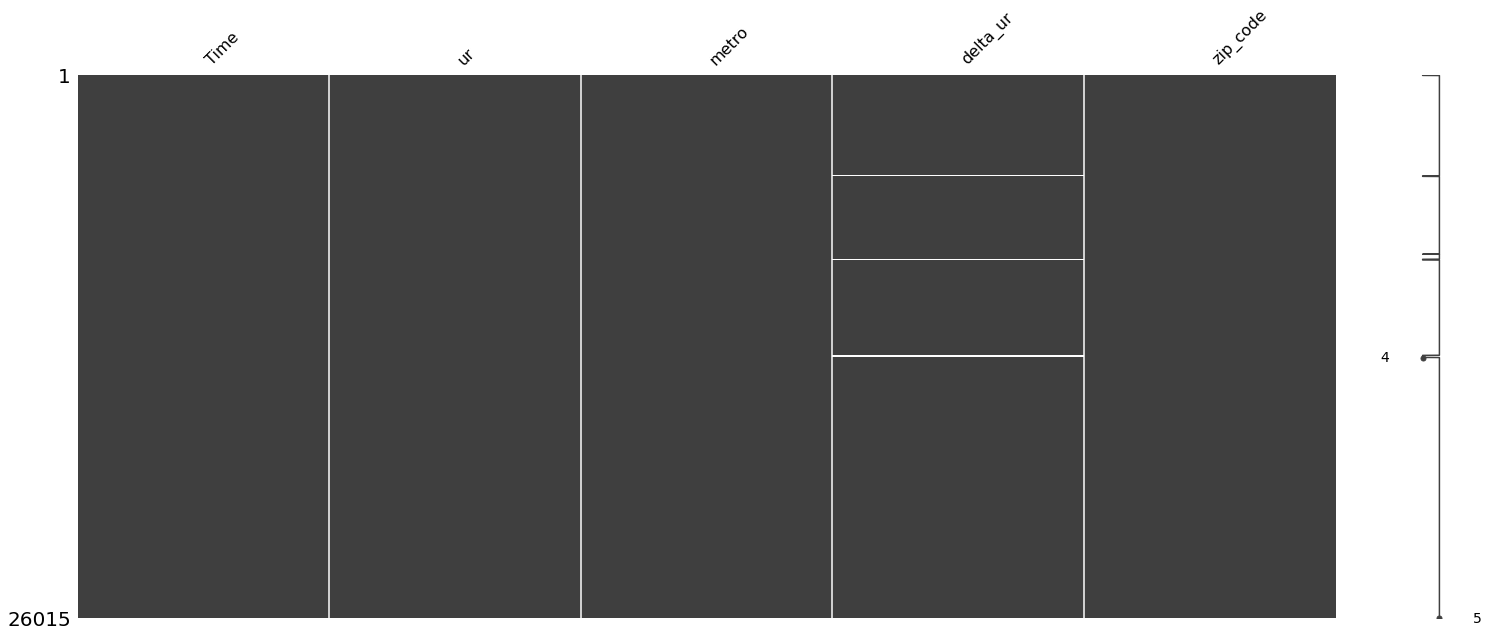

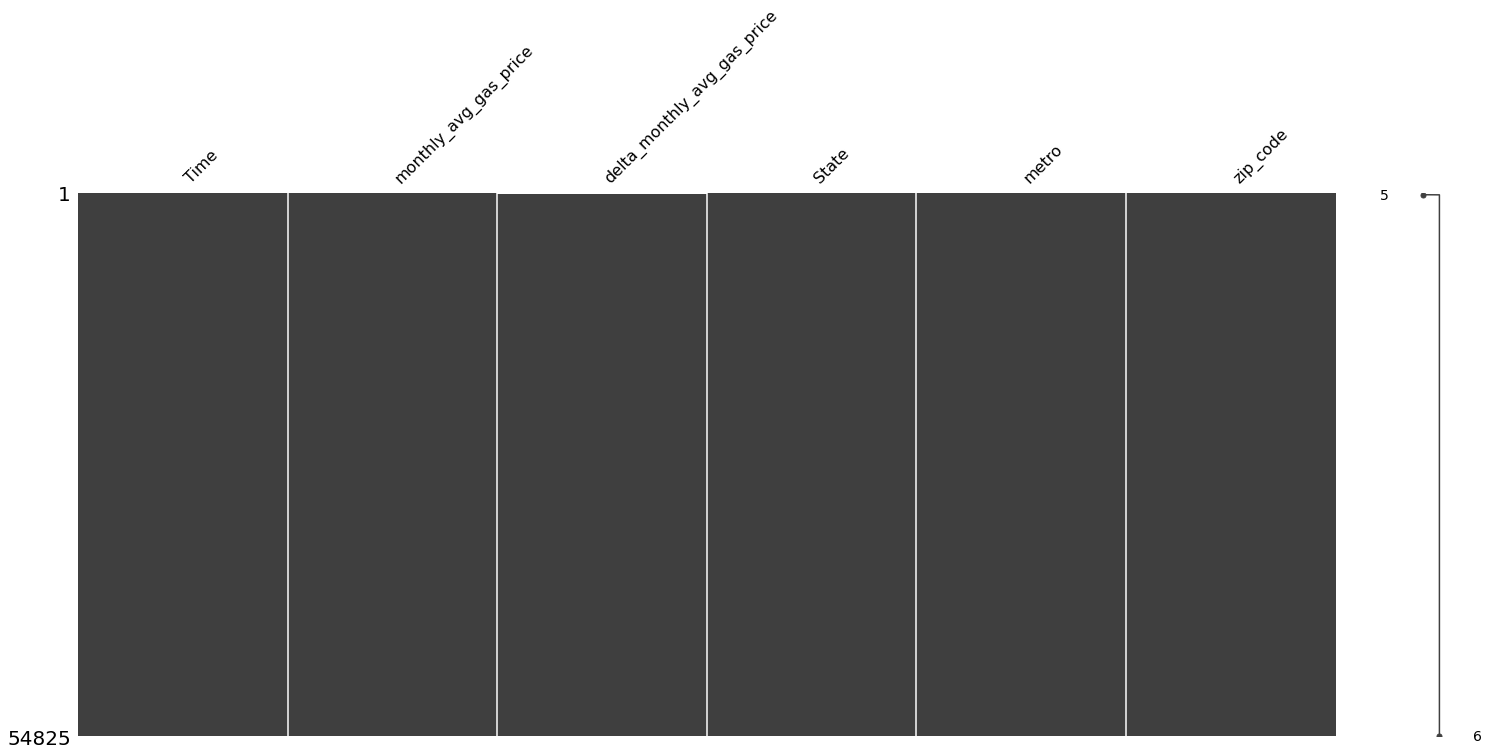

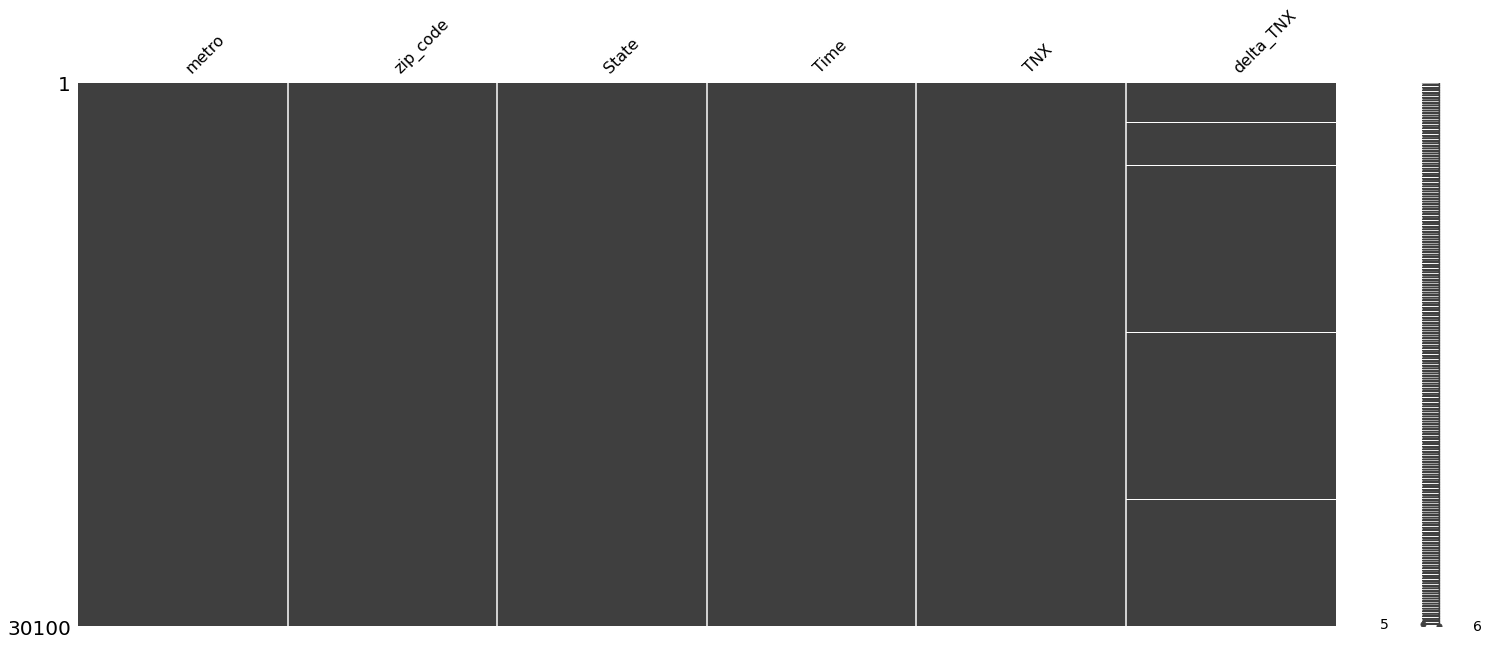

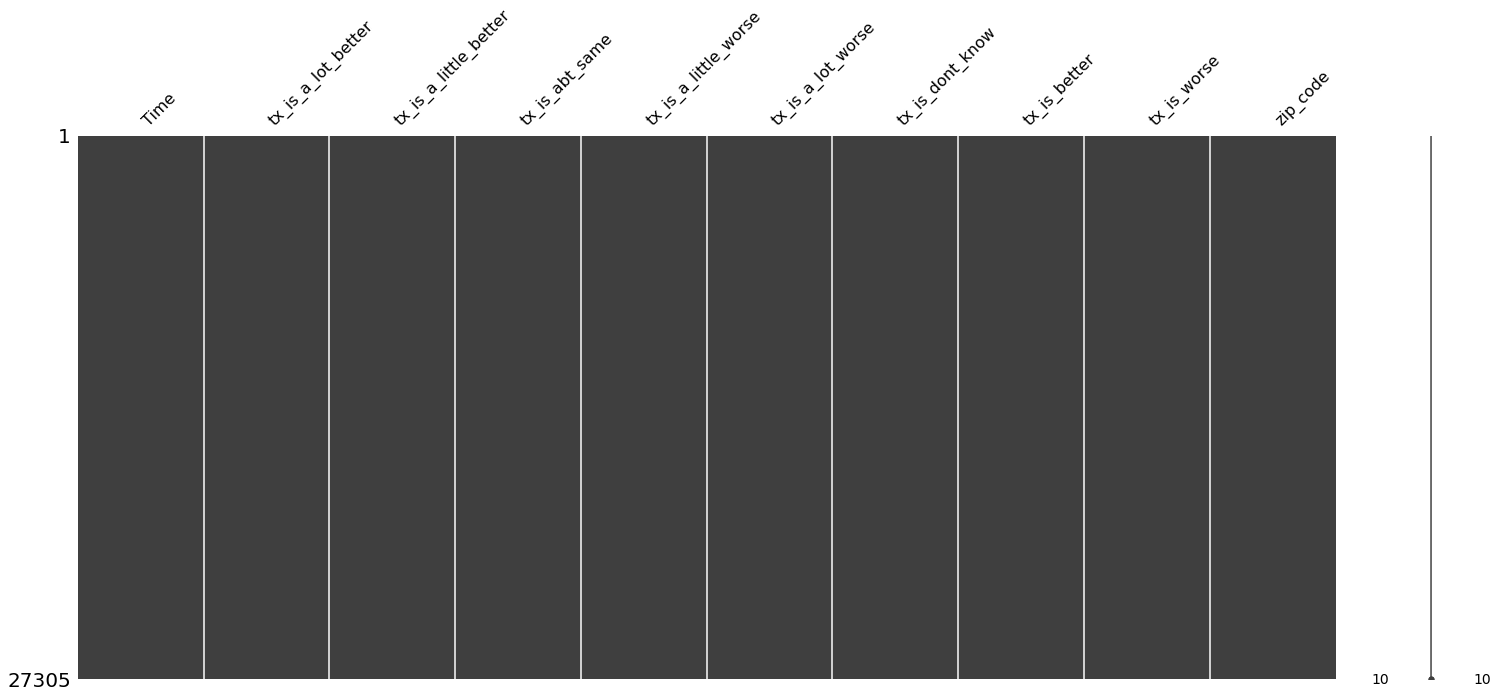

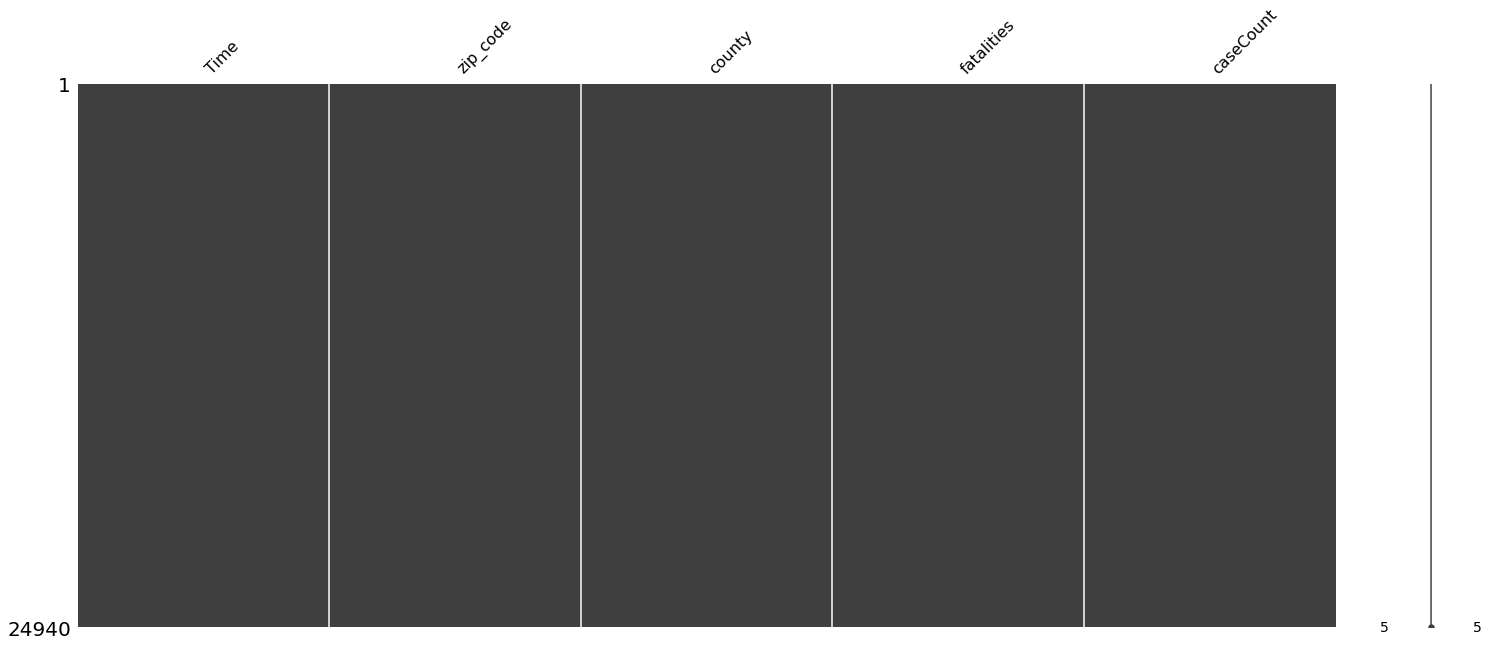

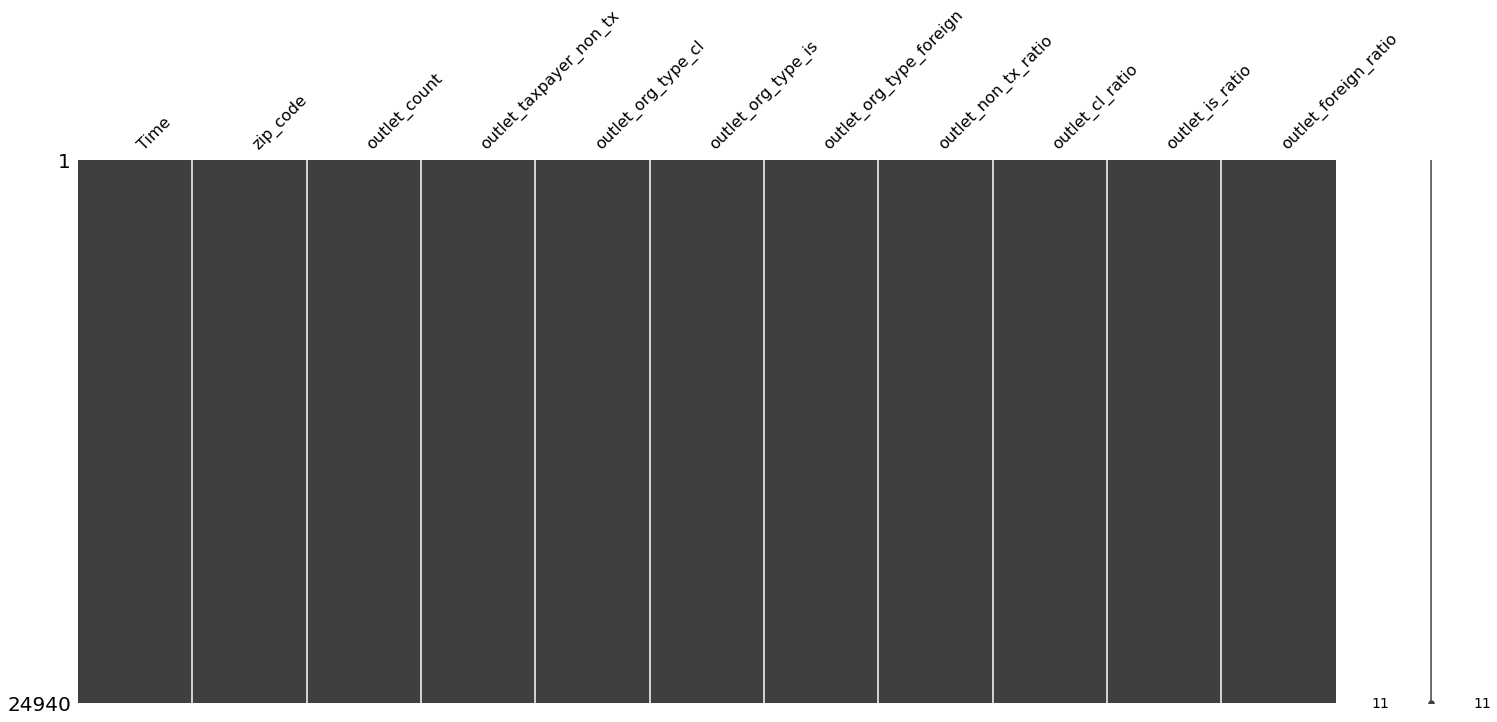

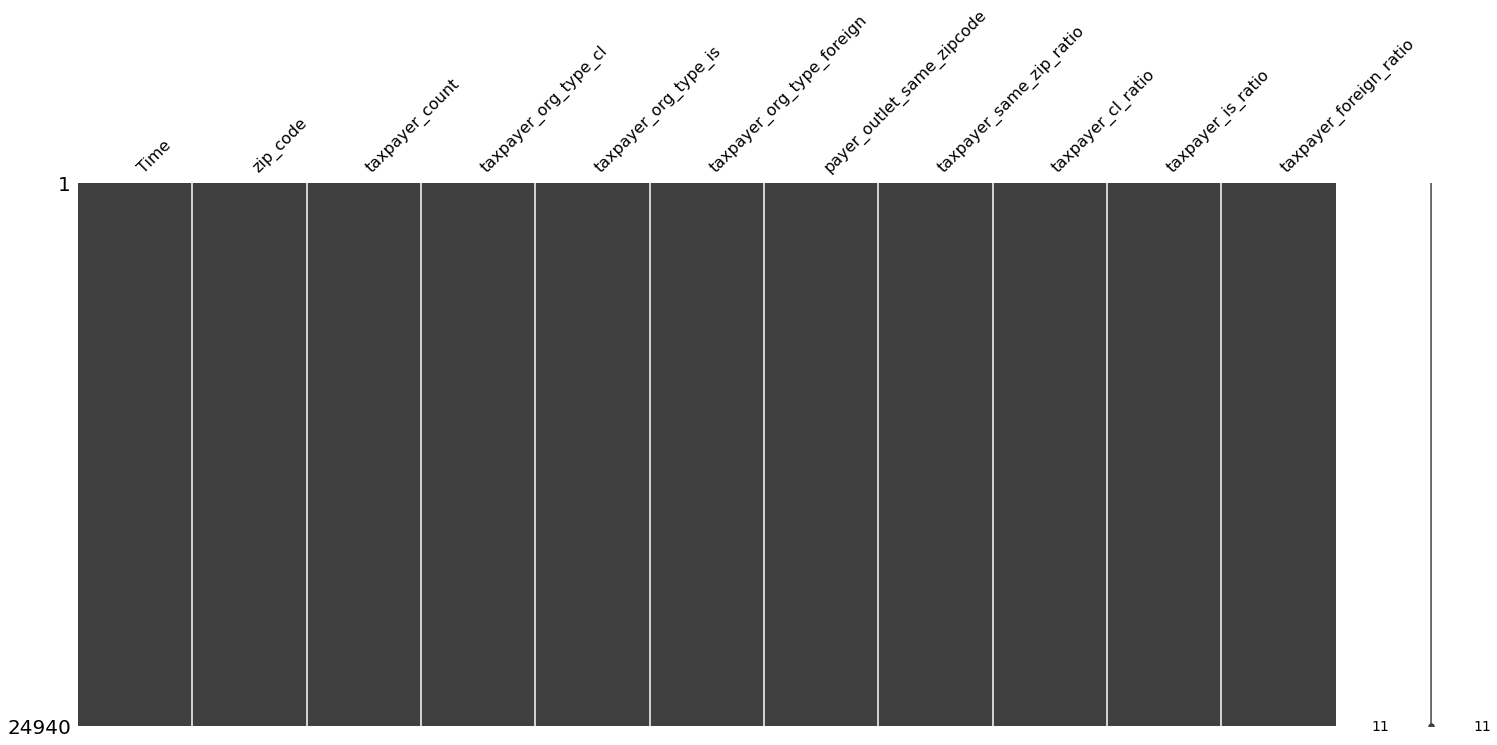

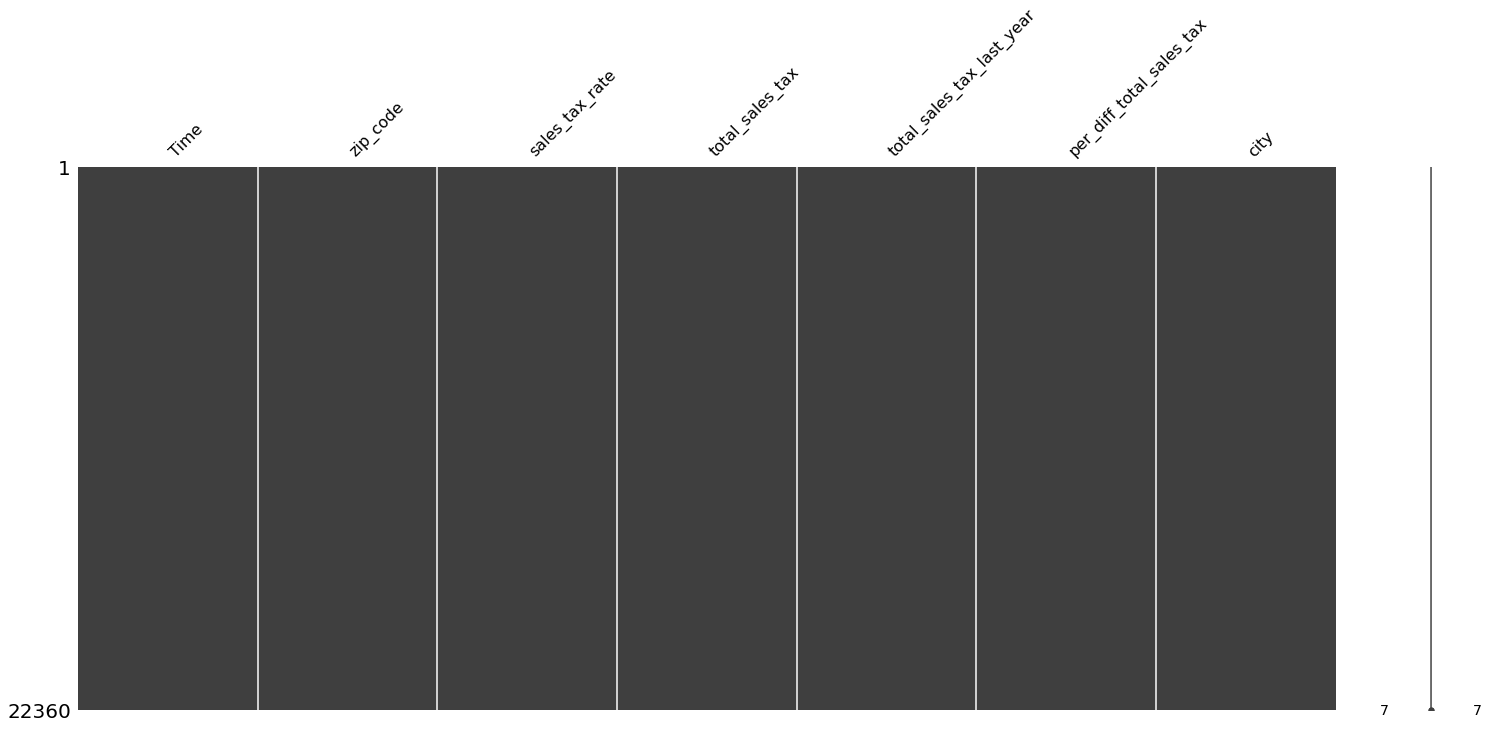

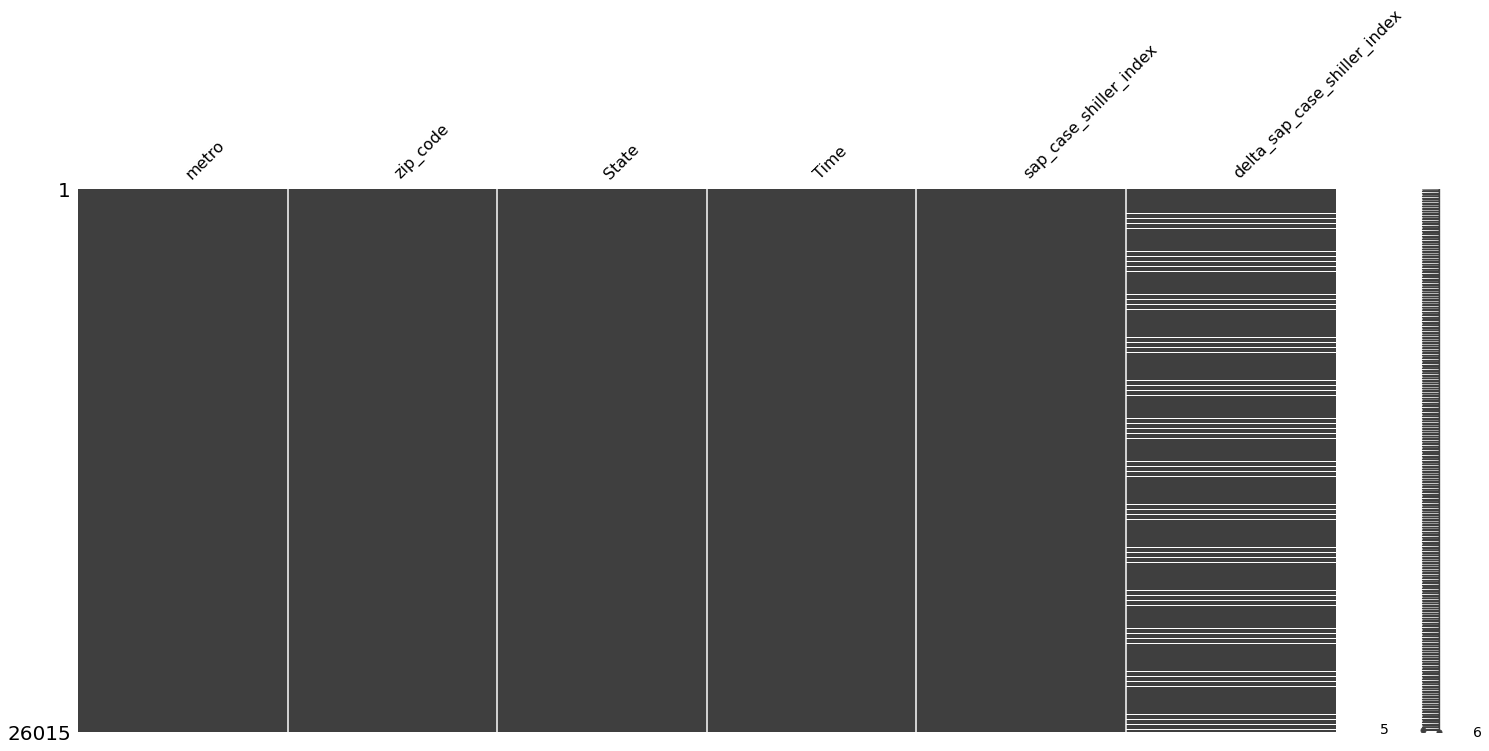

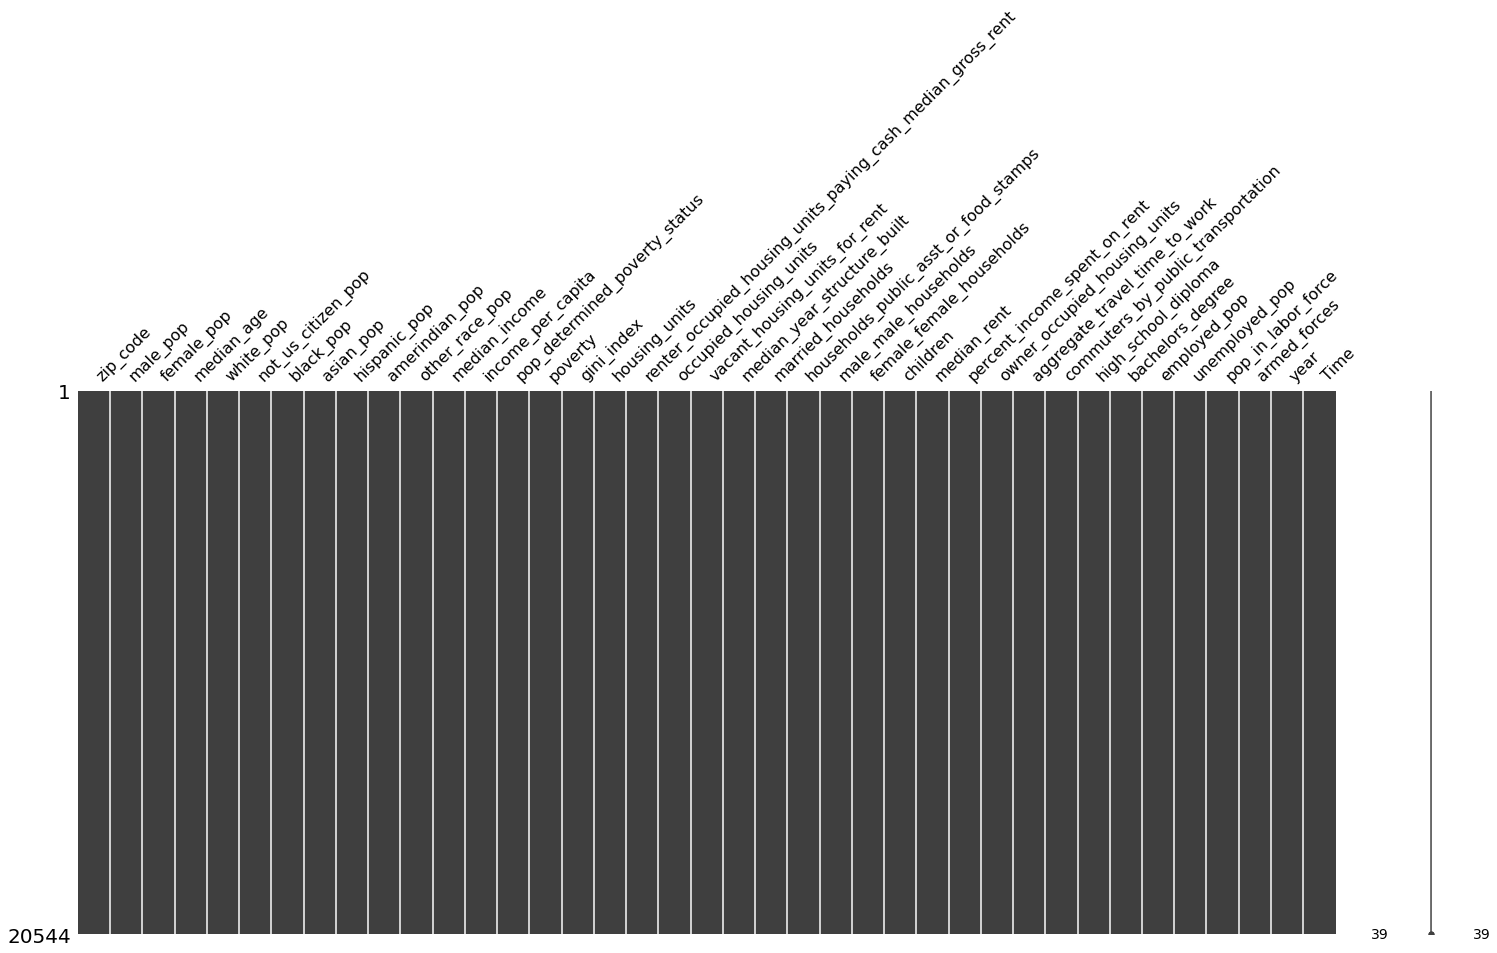

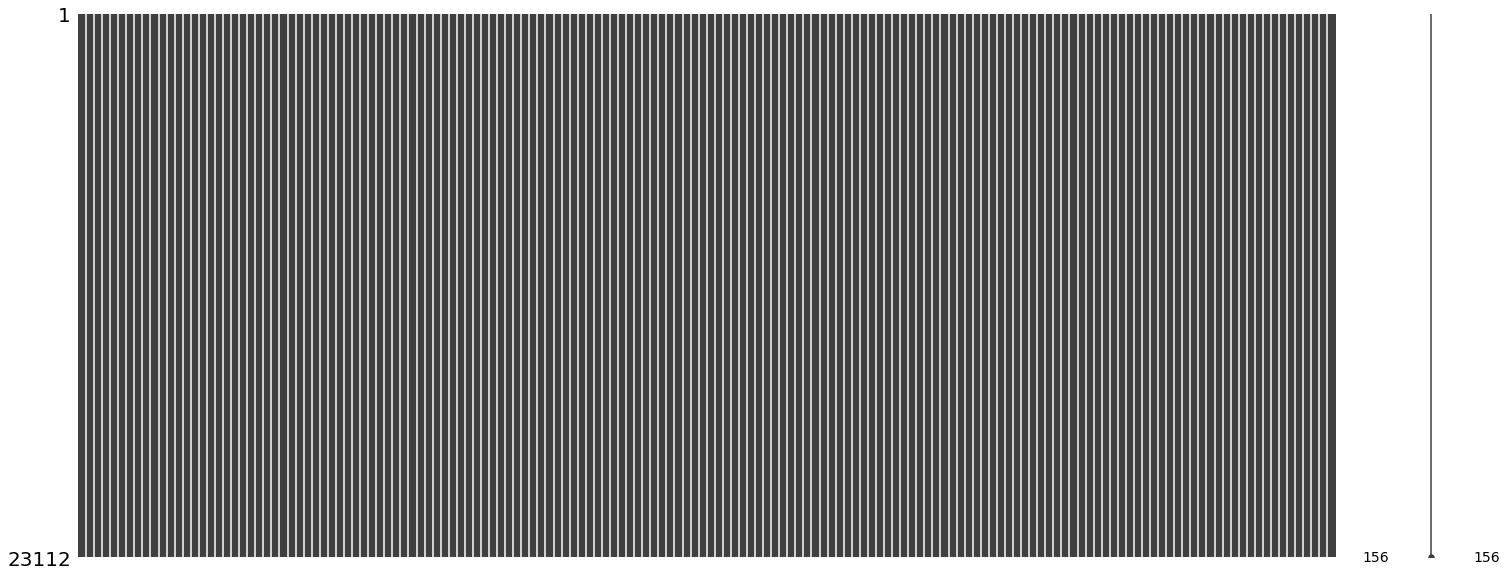

In [7]:
for frame in feature_frames:
    msno.matrix(frame)
    

In [8]:
acs2_set = set(pd.unique(acs2['zip_code']))
acs_set = set(pd.unique(main_frame['zip_code']))

In [9]:
# Check for missing zip code. 75033
acs_set - acs2_set

{75033}

In [10]:
acs2[acs2.isna()]

,zip_code,commuting_population,divorced_men,driving_alone_population,housing_units_built_1940_to_1949,quintile_2_income_share,housing_units_10_to_19_units_rented,quintile_3_income_share,married_women_spouse_absent,female_80_to_84,...,women_with_bachelors_degree,male_45_to_49,housing_units_built_1960_to_1969,housing_units_duplex_owned,married_women_spouse_present,men_with_hs_diploma,quintile_5_mean_income,quintile_2_mean_income,male_75_to_79,Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
23108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
23109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
23110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [11]:
# lag_ = {12:['zori_ssa']}

### Create one master main-frame, no lag

In [12]:
# main_frame = helper.time_lag_merge(main_frame, main_frame, lag_)
main_frame = helper.time_lag_merge(main_frame, weather)
main_frame = helper.time_lag_merge(main_frame, env_viol)
main_frame = helper.time_lag_merge(main_frame, daycare)
main_frame = helper.time_lag_merge(main_frame, econ)
main_frame = helper.time_lag_merge(main_frame, city_unemp)
main_frame = helper.time_lag_merge(main_frame, gas_prices)
main_frame = helper.time_lag_merge(main_frame, monthly_tnx)
main_frame = helper.time_lag_merge(main_frame, polling)
main_frame = helper.time_lag_merge(main_frame, covid)
# main_frame = helper.time_lag_merge(main_frame, new_biz_ins)
main_frame = helper.time_lag_merge(main_frame, new_biz_out)
main_frame = helper.time_lag_merge(main_frame, new_biz_tax)
# main_frame = helper.time_lag_merge(main_frame, liquor)
main_frame = helper.time_lag_merge(main_frame, sales_tax)
main_frame = helper.time_lag_merge(main_frame, sap)
main_frame = helper.time_lag_merge(main_frame, acs)
main_frame = helper.time_lag_merge(main_frame, acs2)

### Check missing values on large frame

<AxesSubplot:>

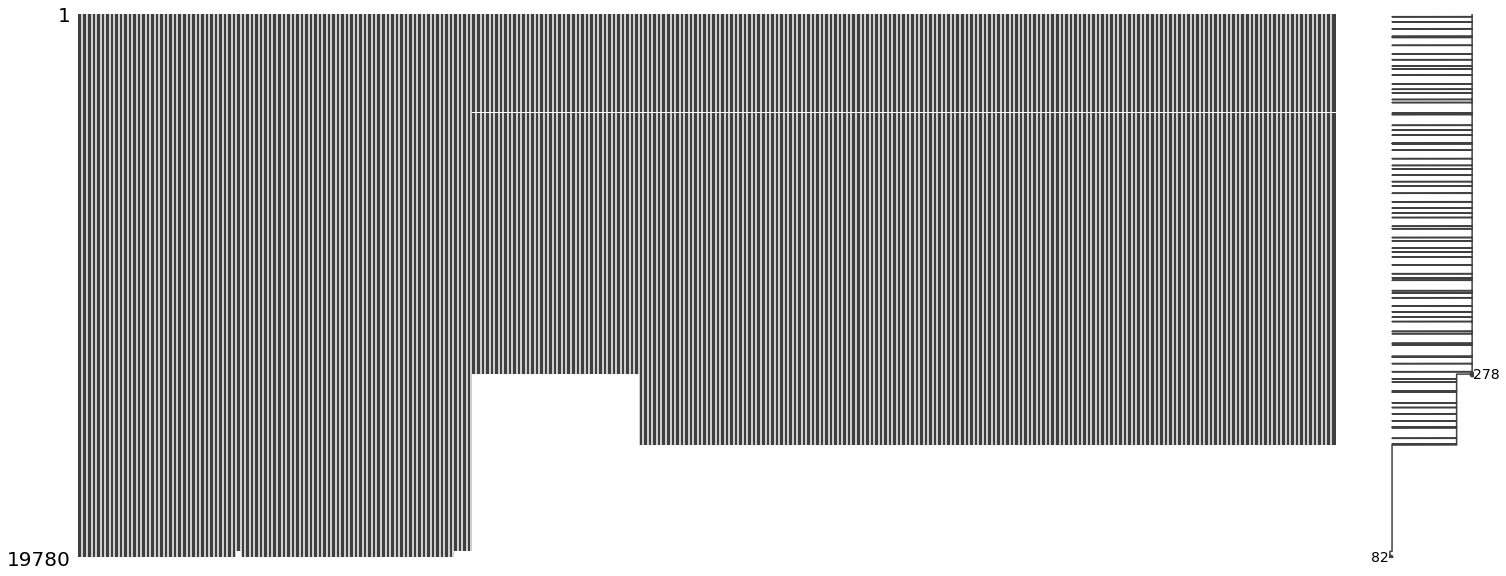

In [15]:
main_frame = main_frame.sort_values('Time')
msno.matrix(main_frame)

<AxesSubplot:>

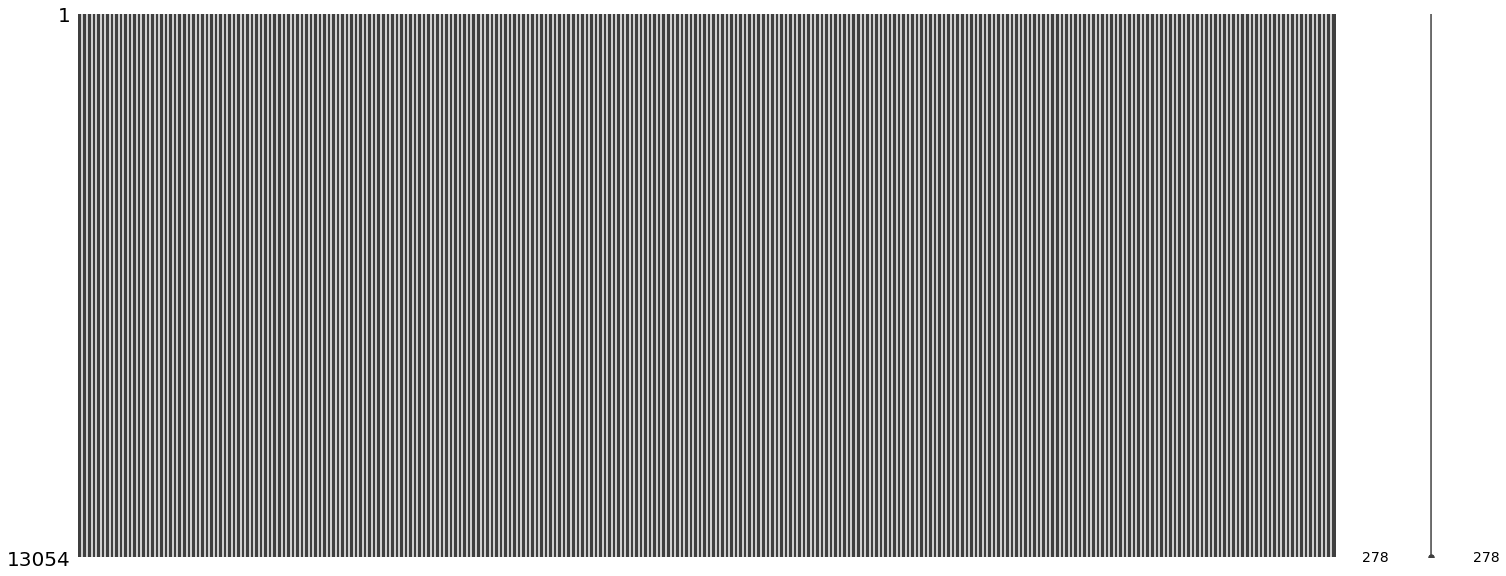

In [33]:
## Delete any rows with null values
main_frame = main_frame.dropna()
msno.matrix(main_frame)

In [41]:
## Get column names
acs_cols = acs.columns.to_list()
print(len(acs_cols))
acs2_cols = acs2.columns.to_list()
print(len(acs2_cols))
acs_cols.extend(acs2_cols)
print(len(acs_cols))

39
156
195


In [46]:
for col in main_frame.columns.to_list():
    print(col)

Time
zip_code
zori_ssa
mintempC
maxtempC
precipMM
env_violation_count
num_daycare_permit
daycare_childcare_subsidies
daycare_corrective_action
daycare_adverse_action
Consumer Confidence Index TX
Consumer Confidence West South Central
Consumer Confidence Index US
Consumer Price Index TX
Consumer Price Index U.S.
Nonfarm Employment TX
Nonfarm Employment U.S.
Unemployment TX
Unemployment U.S.
Single Family Building Permits TX
Multi Family Building Permits TX
Existing Single Family Home Sales TX
Existing Single Family Home Price TX
Non Residential Building Construction
Total Sales Tax Collections Retail TX
Total Sales Tax Collections TX
Retail Gasoline Price TX
Retail Diesel Price TX
Nonfarm Employment Illinois
Nonfarm Employment Florida
Nonfarm Employment New York
Nonfarm Employment Texas
Nonfarm Employment California
Gross Value Crude Oil Production
Gross Value Natural Gas Production
Motor Fuel Taxed Gasoline
Motor Fuel Taxed Diesel
ur
metro
delta_ur
monthly_avg_gas_price
delta_monthly_a

In [ ]:
# # Check missing values rows 
# missing_vals = main_frame[main_frame['tx_is_a_lot_better'].isna()]

In [47]:
main_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13054 entries, 0 to 6684
Columns: 278 entries, Time to male_75_to_79
dtypes: datetime64[ns](1), float64(267), int64(1), object(9)
memory usage: 27.8+ MB


In [ ]:

# to_drop = ['outlet_taxpayer_non_tx_right', 'outlet_org_type_cl_right', 'outlet_org_type_is_right', 'outlet_org_type_foreign_right']    

In [48]:
## Fill with zeros (change this later)
main_frame = main_frame.fillna(0)
main_frame = main_frame.drop(columns=['metro_right', 'State_right'])

# Check columns and missing values
main_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13054 entries, 0 to 6684
Columns: 273 entries, Time to male_75_to_79
dtypes: datetime64[ns](1), float64(267), int64(1), object(4)
memory usage: 27.3+ MB


In [49]:
# # Save csv
# main_frame.to_csv('all_vars2.csv')